In [21]:
import pandas as pd

from utils.cleanData import cleanData

In [9]:
df = cleanData(path="data/raw/accepted_2007_to_2018Q4.csv")
df = df.dropna()
df

C:\Users\Renan\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,int_rate,grade,chargedOff,paid,late,current,prob,term,annual_inc,annual_inc_joint,...,OTHER,RENT,BadPurpose,GoodPurpose,BasicIntRate,recent,bad_rec,almostBroken,chargeOff,overDue
0,13.99,3.0,0,1,0,0,0,3.0,55000.0,0.0,...,0.0,0.0,1.0,0.0,0.24,0.0,0.0,0.0,0.0,1.0
1,11.99,3.0,0,1,0,0,0,3.0,65000.0,0.0,...,0.0,0.0,0.0,1.0,0.24,0.0,0.0,1.0,0.0,0.0
2,10.78,2.0,0,1,0,0,0,5.0,63000.0,71000.0,...,0.0,0.0,0.0,1.0,0.24,0.0,0.0,1.0,0.0,0.0
3,14.85,3.0,0,0,0,1,0,5.0,110000.0,0.0,...,0.0,0.0,1.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0
5,13.44,3.0,0,1,0,0,0,3.0,34000.0,0.0,...,0.0,1.0,1.0,0.0,0.24,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260662,13.99,3.0,0,0,0,1,0,5.0,125000.0,0.0,...,0.0,0.0,1.0,0.0,0.40,0.0,1.0,0.0,0.0,0.0
2260664,8.99,2.0,0,0,0,1,0,5.0,108000.0,0.0,...,0.0,0.0,1.0,0.0,0.40,0.0,1.0,1.0,0.0,1.0
2260665,13.49,3.0,0,0,0,1,0,5.0,227000.0,0.0,...,0.0,0.0,1.0,0.0,0.40,0.0,0.0,1.0,0.0,1.0
2260666,13.49,3.0,1,0,0,0,1,5.0,110000.0,0.0,...,0.0,1.0,1.0,0.0,0.40,0.0,1.0,1.0,0.0,1.0


In [10]:
tarNames = ["int_rate", "grade", "chargedOff", "paid", "late", "current", "prob"]
target = df[tarNames]
target.head()

,int_rate,grade,chargedOff,paid,late,current,prob
0,13.99,3.0,0,1,0,0,0
1,11.99,3.0,0,1,0,0,0
2,10.78,2.0,0,1,0,0,0
3,14.85,3.0,0,0,0,1,0
5,13.44,3.0,0,1,0,0,0


In [11]:
features = df.drop(columns=tarNames)
features.head()

,term,annual_inc,annual_inc_joint,long_job,dti,delinq,ANY,MORTGAGE,NONE,OTHER,RENT,BadPurpose,GoodPurpose,BasicIntRate,recent,bad_rec,almostBroken,chargeOff,overDue
0,3.0,55000.0,0.0,1.0,5.91,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.24,0.0,0.0,0.0,0.0,1.0
1,3.0,65000.0,0.0,1.0,16.06,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.24,0.0,0.0,1.0,0.0,0.0
2,5.0,63000.0,71000.0,1.0,10.78,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.24,0.0,0.0,1.0,0.0,0.0
3,5.0,110000.0,0.0,1.0,17.06,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0
5,3.0,34000.0,0.0,1.0,10.20,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.24,0.0,0.0,1.0,0.0,0.0


# Separação de dados de treino e de teste

In [12]:
from sklearn.model_selection import train_test_split

const = pd.Series([1] * len(features), name="const", index=features.index)
x = features.join(const)

x_train, x_test, y_train, y_test = train_test_split(x, target)

# Modelos

# Taxa de Juros

Como a taxa de juros é uma variável contínua, então dos modelos que aprendemos o mais apropriado é Regresão Linear, LASSO ou uma Random Forest Regression.

## Regressão Linear

In [13]:
from statsmodels.regression.linear_model import OLS

linRegIntRate = OLS(y_train["int_rate"], x_train)
linRegIntRate = linRegIntRate.fit()
linRegIntRate.rsquared

0.0011464124010130972

## Random Forest Regression

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

RDIntRate = RandomForestRegressor().fit(x_train, y_train["int_rate"])
y_pred = RDIntRate.predict(x_test)
r2_score(y_test["int_rate"], y_pred)

-0.08121749253711519

## Lasso

In [16]:
from sklearn.linear_model import Lasso

LassoIntRate = Lasso().fit(x_train, y_train["int_rate"])
y_pred = LassoIntRate.predict(x_test)
r2_score(y_test["int_rate"], y_pred)

-4.718741863118936e-05

# Grade

A variável *grade* é uma variável discreta ordinal, entretanto não aprendemos nenhum modelo que seja feito especificamente para este tupo de dado, entretanto a regressão logística funciona com esse tipo dado, embora embora não se ajuste bem a valores extremos da variável dependente.

In [17]:
from sklearn.linear_model import LogisticRegression

logRegGrade = LogisticRegression().fit(x_train, y_train["grade"])
y_pred = logRegGrade.predict(x_test)
r2_score(y_test["grade"], y_pred)

C:\Users\Renan\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-0.18734042458972944

Como também há poucas métricas para avaliação de modelos com variáveis categóricas, tivemos que usar o R2 que embora não seja apropriado tem a característica de quanto mais distante a previsão do valor verdadeiro maior a punição.

# Prob

*Prob* representa se ouve um atraso significativo ou calote, como é uma variável binária os modelos usados serão a regressão logística, RandomForest e o Naive Bayes Gaussiano.

In [18]:
from sklearn.metrics import classification_report


LogRegProb = LogisticRegression().fit(x_train, y_train["prob"])
y_pred = LogRegProb.predict(x_test)
print(classification_report(y_test["prob"], y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    447052
           1       0.00      0.00      0.00     63585

    accuracy                           0.88    510637
   macro avg       0.44      0.50      0.47    510637
weighted avg       0.77      0.88      0.82    510637



In [19]:
RDProb = RandomForestRegressor().fit(x_train, y_train["prob"])

def roundArray(line):
    if line >= 0.5:
        return 1
    else:
        return 0

y_pred = RDProb.predict(x_test)
y_pred = list(map(roundArray, y_pred))
print(classification_report(y_test["prob"], y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93    447052
           1       0.17      0.02      0.03     63585

    accuracy                           0.87    510637
   macro avg       0.52      0.50      0.48    510637
weighted avg       0.79      0.87      0.82    510637



In [20]:
from sklearn.naive_bayes import GaussianNB


GNBProb = GaussianNB().fit(x_train, y_train["prob"])
y_pred = GNBProb.predict(x_test)
print(classification_report(y_test["prob"], y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    447052
           1       0.00      0.00      0.00     63585

    accuracy                           0.88    510637
   macro avg       0.44      0.50      0.47    510637
weighted avg       0.77      0.88      0.82    510637



# Conclusões

Todos os modelos tiveram uma performance preditiva pobre. Sendo assim, provavelmente ou os dados não são confiáveis ou não são as melhores variáveis para prever a chance de default, atraso ou o grau de risco.

Esse fenômeno pode ser facilmente visualizado na matrix de correlação abaixo:

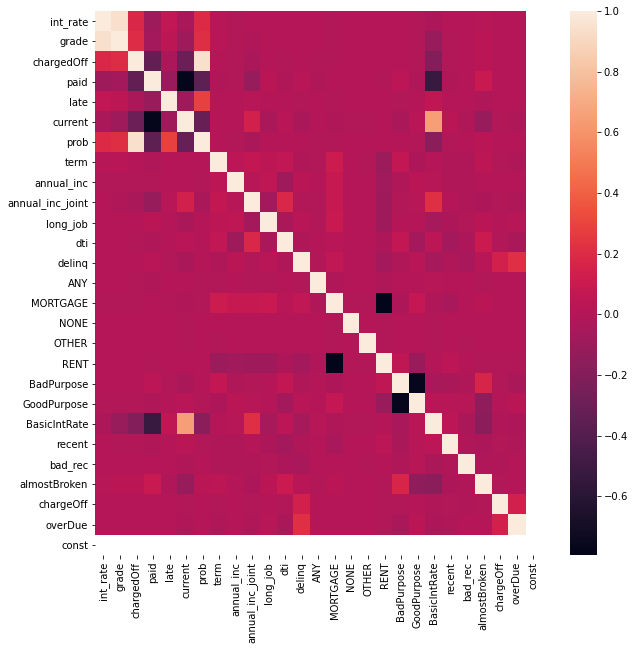

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(target.join(x).corr())
plt.show()

A matrix mostra que há pouca correlação de qualquer uma das variáveis dependentes com as variáveis alvo.

Embora a correlação não sirva para indicar se uma variável tem poder explicativo sobre a outra, ela serve como uma pista para nossa hipótese de dados fracos.

Faz mais sentido que seja a segunda hipótese, isto é, outras variáveis são os principais determinantes de nossas variáveis alvo.

Por exemplo, faz sentido que não haja muita negociação na taxa de juros contratada, assim o as variáveis do cliente não têm muito efeito sobre a taxa de juros.

Sendo assim, podemos inferir que o processo de uma boa modelagem de risco de crédito leva em consideração outras variáveveis que não são usadas aqui, outra possibilidade é uma modelagem dinâmica que acompanha a evolução dessas variáveis.